In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data preparation

In [2]:
df = pd.read_excel('company_data.xlsx')
df.head()

,Name,ZIP,City,Unnamed: 3,Web,Revenue (in thousands),Employees,Area,Address,Region
0,SCA HYGIENE PRODUCTS SL,43812,Puigpelat,977030600.0,www.sca.com,618000.0,1200,Industria,Ctra. Vilabella (km 2),ALT CAMP
1,LEAR CORPORATION HOLDING SPAIN SLU,43800,Valls,977617100.0,www.lear.com,506088.0,1216,Industria,"C/ Fusters, 54, Pol. Ind.",ALT CAMP
2,COVESTRO SL.,43110,Tarragona,977358100.0,www.bayer.es,300592.0,344,Petroquímica y plásticos,"C/Entrevías (Pol. Ind. Químico Sur), s/n",TARRAGONES
3,ASOCIACIÓN NUCLEAR ASCÓ VANDELLÓS II AIE,43891,Vandellós l'Hospitalet de l'Infant,977818800.0,www.anav.es,276654.0,1047,"Agua, Energía y Residuos",Ctra. Nacional 340 (km 1.123),BAIX CAMP
4,BASF SONATRACH PROPANCHEM SA,43006,Tarragona,977256703.0,www.basf.es,276019.0,11,Petroquímica y plásticos,Ctra. Nacional 340 (km 1.156),TARRAGONES


In [3]:
df = df.rename(columns={'Revenue (in thousands)': 'Revenue_in_thousands'})
company_df = df[['Name', 'Revenue_in_thousands', 'Employees', 'Area', 'Region']]
company_df.head()

,Name,Revenue_in_thousands,Employees,Area,Region
0,SCA HYGIENE PRODUCTS SL,618000.0,1200,Industria,ALT CAMP
1,LEAR CORPORATION HOLDING SPAIN SLU,506088.0,1216,Industria,ALT CAMP
2,COVESTRO SL.,300592.0,344,Petroquímica y plásticos,TARRAGONES
3,ASOCIACIÓN NUCLEAR ASCÓ VANDELLÓS II AIE,276654.0,1047,"Agua, Energía y Residuos",BAIX CAMP
4,BASF SONATRACH PROPANCHEM SA,276019.0,11,Petroquímica y plásticos,TARRAGONES


In [4]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  809 non-null    object 
 1   Revenue_in_thousands  809 non-null    float64
 2   Employees             809 non-null    object 
 3   Area                  809 non-null    object 
 4   Region                801 non-null    object 
dtypes: float64(1), object(4)
memory usage: 31.7+ KB


In [6]:
company_df['Area'] = company_df['Area'].str.upper()  #ensuring that all the values are unambiguous

C:\Users\Kaja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Distribution of companies by revenue/emploees number

In [9]:
plt.style.use('seaborn')

Text(0.5, 0, 'Revenue in thousands')

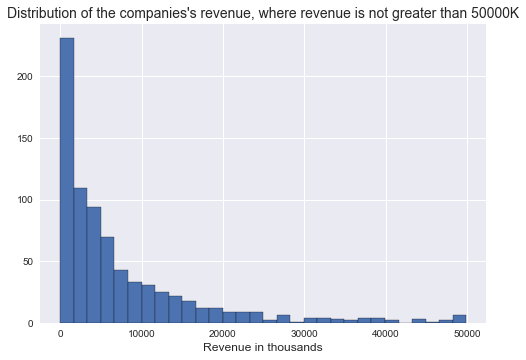

In [198]:
threshold = 50000
rev_filter = company_df['Revenue_in_thousands'] < threshold
company_df.loc[rev_filter,'Revenue_in_thousands'].hist(bins=30,edgecolor='black')
plt.title(f"Distribution of the companies's revenue, where revenue is not greater than {threshold}K", size = 14)
plt.xlabel('Revenue in thousands', size = 12)
# plt.ylim(bottom=0,top=250)

In [11]:
# rev_filter = company_df['Revenue_in_thousands'] >= threshold
# company_df.loc[rev_filter,'Revenue_in_thousands'].hist(bins=30,edgecolor='black')
# plt.title(f"Distribution of the companies's revenue, where revenue is larger than or equal {threshold}K")
# plt.xlabel('Revenue in thousands')

In [12]:
unique = company_df['Employees'].unique()
for el in unique:
    if not isinstance(el, int):
        print(el)

n.d.


In [13]:
empl_filter1 = company_df['Employees'] == 'n.d.' #dropping rows with "n.d." value as 'Employees'
empl_df = company_df[~empl_filter1]

Text(0.5, 0, 'Revenue in thousands')

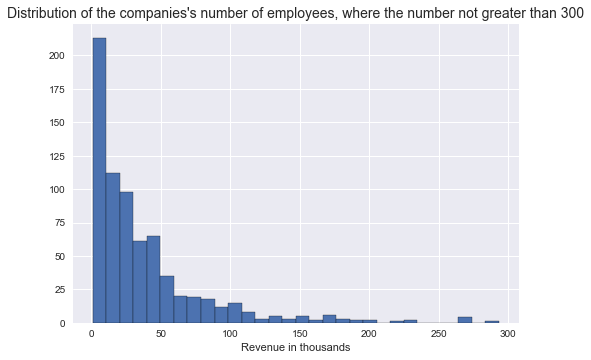

In [14]:
empl_filter2 = empl_df['Employees'] < 300
empl_df.loc[empl_filter2, 'Employees'].hist(bins=30,edgecolor='black')
plt.title(f"Distribution of the companies's number of employees, where the number not greater than 300", size = 14)
plt.xlabel('Revenue in thousands')

In [15]:
# empl_filter2 = empl_df['Employees'] > 300
# empl_df.loc[empl_filter2, 'Employees'].hist(bins=30,edgecolor='black')

In [16]:
# company_df['Area'].value_counts()

# Areas by empl, revenue, counts

In [30]:
#create df with revenues, employees and number of companies grouped by areas
areas_r = company_df.groupby('Area').Revenue_in_thousands.sum().sort_values(ascending=False)
areas_e = empl_df.groupby('Area').Employees.sum().sort_values(ascending=False)
bar_df = areas_r.to_frame()
bar_df['Employees'] = areas_e
bar_df['Number_of_companies'] = company_df['Area'].value_counts()

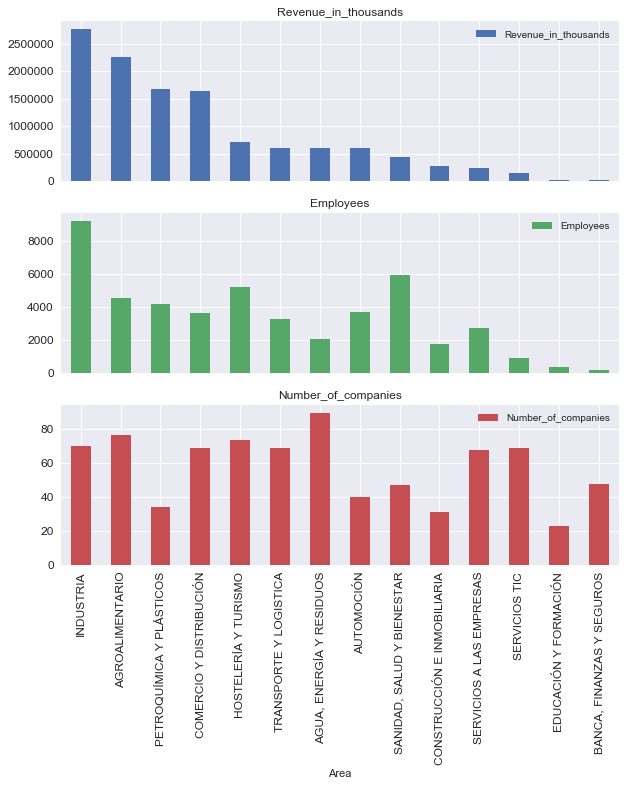

In [31]:
axes = bar_df.plot.bar(rot=90, subplots=True,figsize =(10,10), fontsize= 12)

# Division of revenue/employees by region

In [182]:
company_df['Region'].value_counts().count(), empl_df['Region'].value_counts().count()

(10, 10)

In [183]:
#preparing revenue data
region_r = company_df.groupby('Region').Revenue_in_thousands.sum().sort_values(ascending=False)
top_region_r = company_df.groupby('Region').Revenue_in_thousands.sum().sort_values(ascending=False).head(4)
other_region_r = company_df.groupby('Region').Revenue_in_thousands.sum().sort_values(ascending=False).tail(6)
top_region_r['OTHERS'] = other_region_r.sum()
top_region_r.sum() == region_r.sum() #checking if no values have been missed

True

In [184]:
#preparing employees data
region_e = empl_df.groupby('Region').Employees.sum().sort_values(ascending=False)
top_region_e = empl_df.groupby('Region').Employees.sum().sort_values(ascending=False).head(4)
other_region_e = empl_df.groupby('Region').Employees.sum().sort_values(ascending=False).tail(6)
top_region_e['OTHERS'] = other_region_e.sum()
top_region_e.sum() == region_e.sum() #checking if no values have been missed

True

In [185]:
# plt.plot(top_region_r.index, top_region_r.values)
# plt.xticks(rotation = 90)
# # plt.axis(xmin=1880, xmax=2018)

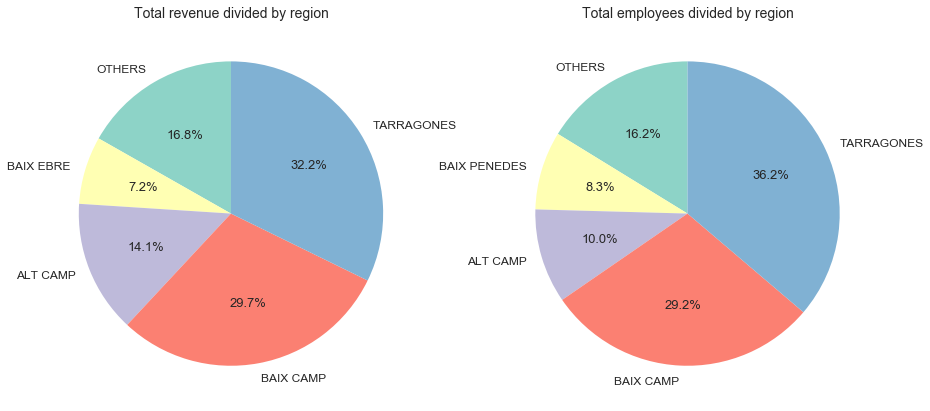

In [192]:
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
fig, [ax1, ax2] = plt.subplots(ncols=2,figsize=(15,15))

# first plot
patches, texts, autotexts = ax1.pie(top_region_r[::-1].values, labels=top_region_r[::-1].index, colors=colors, 
                                   startangle=90,autopct='%1.1f%%')
ax1.set_title('Total revenue divided by region',fontsize=14)
for i in range(5):
    texts[i].set_fontsize(12)
    autotexts[i].set_fontsize(13)

# second plot
patches, texts, autotexts = ax2.pie(top_region_e[::-1].values, labels=top_region_e[::-1].index, colors=colors, 
                                   startangle=90,autopct='%1.1f%%')
ax2.set_title('Total employees divided by region',fontsize=14)
for i in range(5):
    texts[i].set_fontsize(12)
    autotexts[i].set_fontsize(13)

In [194]:
df2 = pd.read_excel('company_data.xlsx', 'Benefits')

In [201]:
benefits_by_name = df2.set_index('Name')

In [203]:
benefits_by_name['Benefits (in thousands)']

Name
BASF SONATRACH PROPANCHEM SA          50710.00000
PORT AVENTURA ENTERTAINMENT SAU       29931.00000
LEAR CORPORATION HOLDING SPAIN SLU    28332.00000
TECHNICAL MINDS INVESTMENT SL         21077.33177
APPLUS IDIADA                         13897.00000
                                         ...     
ROCAMORA NOVA SL.                      -144.92905
IMMO MODOIS SL                         -145.33582
CONSTRUCCIONS ARAYO ARDIT SL           -145.42563
VENDISTARRACO SL                       -145.96200
FUNDACIÓ PER A. L. ATENCIÓ SOCIAL      -146.83946
Name: Benefits (in thousands), Length: 12479, dtype: float64

In [199]:
companies_by_name = company_df.set_index('Name')

In [200]:
companies_by_name

,Revenue_in_thousands,Employees,Area,Region
Name,,,,
SCA HYGIENE PRODUCTS SL,618000.00000,1200,INDUSTRIA,ALT CAMP
LEAR CORPORATION HOLDING SPAIN SLU,506088.00000,1216,INDUSTRIA,ALT CAMP
COVESTRO SL.,300592.00000,344,PETROQUÍMICA Y PLÁSTICOS,TARRAGONES
ASOCIACIÓN NUCLEAR ASCÓ VANDELLÓS II AIE,276654.00000,1047,"AGUA, ENERGÍA Y RESIDUOS",BAIX CAMP
BASF SONATRACH PROPANCHEM SA,276019.00000,11,PETROQUÍMICA Y PLÁSTICOS,TARRAGONES
...,...,...,...,...
TRIPER SA,38.16768,1,"AGUA, ENERGÍA Y RESIDUOS",MONTSIÀ
ESPAI SOTA ZERO SL.,38.10019,n.d.,"AGUA, ENERGÍA Y RESIDUOS",BAIX EBRE
SOLARNAU ENERGIA SL,37.82391,n.d.,"AGUA, ENERGÍA Y RESIDUOS",BAIX CAMP


In [222]:
companies_by_name['Benefits_in_thousands'] = benefits_by_name['Benefits (in thousands)']

In [223]:
companies_by_name

,Revenue_in_thousands,Employees,Area,Region,Benefits_in_thousands
Name,,,,,
SCA HYGIENE PRODUCTS SL,618000.00000,1200,INDUSTRIA,ALT CAMP,NaN
LEAR CORPORATION HOLDING SPAIN SLU,506088.00000,1216,INDUSTRIA,ALT CAMP,28332.00000
COVESTRO SL.,300592.00000,344,PETROQUÍMICA Y PLÁSTICOS,TARRAGONES,NaN
ASOCIACIÓN NUCLEAR ASCÓ VANDELLÓS II AIE,276654.00000,1047,"AGUA, ENERGÍA Y RESIDUOS",BAIX CAMP,NaN
BASF SONATRACH PROPANCHEM SA,276019.00000,11,PETROQUÍMICA Y PLÁSTICOS,TARRAGONES,50710.00000
...,...,...,...,...,...
TRIPER SA,38.16768,1,"AGUA, ENERGÍA Y RESIDUOS",MONTSIÀ,575.71088
ESPAI SOTA ZERO SL.,38.10019,n.d.,"AGUA, ENERGÍA Y RESIDUOS",BAIX EBRE,-21.78402
SOLARNAU ENERGIA SL,37.82391,n.d.,"AGUA, ENERGÍA Y RESIDUOS",BAIX CAMP,10.25944


In [224]:
top_r = companies_by_name.sort_values('Revenue_in_thousands', ascending=False).head(10)

In [225]:
top_r

,Revenue_in_thousands,Employees,Area,Region,Benefits_in_thousands
Name,,,,,
BORGES INTERNATIONAL GROUP SL.,675000.000000,1047,AGROALIMENTARIO,BAIX CAMP,5784.00000
SCA HYGIENE PRODUCTS SL,618000.000000,1200,INDUSTRIA,ALT CAMP,NaN
LEAR CORPORATION HOLDING SPAIN SLU,506088.000000,1216,INDUSTRIA,ALT CAMP,28332.00000
COVESTRO SL.,300592.000000,344,PETROQUÍMICA Y PLÁSTICOS,TARRAGONES,NaN
ASOCIACIÓN NUCLEAR ASCÓ VANDELLÓS II AIE,276654.000000,1047,"AGUA, ENERGÍA Y RESIDUOS",BAIX CAMP,NaN
BASF SONATRACH PROPANCHEM SA,276019.000000,11,PETROQUÍMICA Y PLÁSTICOS,TARRAGONES,50710.00000
MAHLE BEHR SPAIN SA.,248858.847000,781,INDUSTRIA,CONCA DE BARBERÀ,5989.94800
PORT AVENTURA ENTERTAINMENT SAU,194150.000000,1727,HOSTELERÍA Y TURISMO,TARRAGONES,29931.00000
PAVO Y DERIVADOS SA,189534.811399,693,AGROALIMENTARIO,MONTSIÀ,8870.39323


In [226]:
top_b = companies_by_name.sort_values('Benefits_in_thousands', ascending=False).head(10)

In [228]:
top_b

,Revenue_in_thousands,Employees,Area,Region,Benefits_in_thousands
Name,,,,,
BASF SONATRACH PROPANCHEM SA,276019.000000,11,PETROQUÍMICA Y PLÁSTICOS,TARRAGONES,50710.00000
PORT AVENTURA ENTERTAINMENT SAU,194150.000000,1727,HOSTELERÍA Y TURISMO,TARRAGONES,29931.00000
LEAR CORPORATION HOLDING SPAIN SLU,506088.000000,1216,INDUSTRIA,ALT CAMP,28332.00000
APPLUS IDIADA,180383.000000,2152,AUTOMOCIÓN,BAIX PENEDES,13897.00000
BIC-IBERIA SA,88224.544000,221,INDUSTRIA,TARRAGONES,13001.01900
TERESA Y JOSÉ PLANA EMPRESA PLANA SLU.,39135.813430,391,TRANSPORTE Y LOGISTICA,TARRAGONES,9755.25501
PAVO Y DERIVADOS SA,189534.811399,693,AGROALIMENTARIO,MONTSIÀ,8870.39323
ANDRÉS PINTALUBA SA,159816.948760,109,AGROALIMENTARIO,BAIX CAMP,8780.62758
LABORATORIOS MAVERICK SL,124266.505080,447,INDUSTRIA,MONTSIÀ,8536.61799


In [229]:
empl_filter1 = companies_by_name['Employees'] == 'n.d.'
top_e = companies_by_name[~empl_filter1].sort_values('Employees', ascending=False).head(10)

In [230]:
top_e

,Revenue_in_thousands,Employees,Area,Region,Benefits_in_thousands
Name,,,,,
APPLUS IDIADA,180383.00000,2152,AUTOMOCIÓN,BAIX PENEDES,13897.00000
PORT AVENTURA ENTERTAINMENT SAU,194150.00000,1727,HOSTELERÍA Y TURISMO,TARRAGONES,29931.00000
GRUPO NAVEC SERVICIOS INDUSTRIALES SL,117563.06800,1251,PETROQUÍMICA Y PLÁSTICOS,TARRAGONES,597.85400
LEAR CORPORATION HOLDING SPAIN SLU,506088.00000,1216,INDUSTRIA,ALT CAMP,28332.00000
SCA HYGIENE PRODUCTS SL,618000.00000,1200,INDUSTRIA,ALT CAMP,NaN
FRAGADÍS SL,155813.30994,1104,COMERCIO Y DISTRIBUCIÓN,TARRAGONES,2259.61481
HOSPITAL DE SANT JOAN DE REUS SAM,127062.39890,1093,"SANIDAD, SALUD Y BIENESTAR",BAIX CAMP,23.88468
ASOCIACIÓN NUCLEAR ASCÓ VANDELLÓS II AIE,276654.00000,1047,"AGUA, ENERGÍA Y RESIDUOS",BAIX CAMP,NaN
BORGES INTERNATIONAL GROUP SL.,675000.00000,1047,AGROALIMENTARIO,BAIX CAMP,5784.00000


In [232]:
top_b.index, top_r.index, top_e.index

(Index(['BASF SONATRACH PROPANCHEM SA', 'PORT AVENTURA ENTERTAINMENT SAU',
        'LEAR CORPORATION HOLDING SPAIN SLU', 'APPLUS IDIADA', 'BIC-IBERIA SA',
        'TERESA Y JOSÉ PLANA EMPRESA PLANA SLU.', 'PAVO Y DERIVADOS SA',
        'ANDRÉS PINTALUBA SA', 'LABORATORIOS MAVERICK SL',
        'HIERROS DEL MEDITERRANEO SA'],
       dtype='object', name='Name'),
 Index(['BORGES INTERNATIONAL GROUP SL.', 'SCA HYGIENE PRODUCTS SL',
        'LEAR CORPORATION HOLDING SPAIN SLU', 'COVESTRO SL.',
        'ASOCIACIÓN NUCLEAR ASCÓ VANDELLÓS II AIE',
        'BASF SONATRACH PROPANCHEM SA', 'MAHLE BEHR SPAIN SA.',
        'PORT AVENTURA ENTERTAINMENT SAU', 'PAVO Y DERIVADOS SA',
        'APPLUS IDIADA'],
       dtype='object', name='Name'),
 Index(['APPLUS IDIADA', 'PORT AVENTURA ENTERTAINMENT SAU',
        'GRUPO NAVEC SERVICIOS INDUSTRIALES SL',
        'LEAR CORPORATION HOLDING SPAIN SLU', 'SCA HYGIENE PRODUCTS SL',
        'FRAGADÍS SL', 'HOSPITAL DE SANT JOAN DE REUS SAM',
        'ASOCIACIÓ

In [236]:
c_dict = {"BASF SONATRACH PROPANCHEM SA": 1}
for el in top_b.index:
    if el in c_dict:
        print('tak')

tak
